# Import Packages

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Up Initial Parameters Here

In [2]:
#Set up initial parameters

S_0 = 100 #0
k_q = 0.5 #1
v_q = 0.063 #2
V_0 = 0.05 #3
sigma_v = 0.38 #4
rho = -0.321 #5
rf = 0.05 #6
delta_t = 1/252 #7
n_years = 2 #8

strike_price = 110 #9

num_simulations = 5000 #10

# Simulate Stock Prices and Volatilities

In [3]:
#Simulation
# set random seed
np.random.seed(1)

V_matrix = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix.iloc[0,i] = V_0
    S_matrix.iloc[0,i] = S_0


dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix.iloc[k,i] = S_matrix.iloc[k-1,i] + rf*S_matrix.iloc[k-1,i]*delta_t + np.sqrt(V_matrix.iloc[k-1, i])*S_matrix.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix.iloc[k,i] = V_matrix.iloc[k-1,i] + k_q*(v_q - V_matrix.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix.iloc[k-1,i])*dW1.iloc[k,i] 
        
        if S_matrix.iloc[k,i] < 0:
            S_matrix.iloc[k,i] = 0
        elif V_matrix.iloc[k,i] < 0:
            V_matrix.iloc[k,i] = 0

In [5]:
S_matrix

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.841223,98.598335,100.589660,99.372541,100.313528,101.704842,97.437728,101.351019,98.585499,101.009272
2,99.814457,97.313537,101.543637,99.011114,100.241148,102.045368,96.497922,101.742060,97.696756,99.286572
3,102.185630,97.782342,102.801440,100.667547,99.087991,101.804795,94.912570,101.750019,97.498160,95.451195
4,102.702016,98.577375,104.664207,101.035562,101.497544,102.730079,93.979745,102.643903,97.415723,95.658786
...,...,...,...,...,...,...,...,...,...,...
499,84.359576,133.790504,128.557608,214.312193,190.415746,89.074565,31.191243,108.238650,101.614627,52.377766
500,84.228224,133.823106,130.020390,213.699605,190.293345,89.593699,32.771485,110.312822,104.770326,52.013511
501,84.370178,133.849659,129.547109,213.346655,188.920798,89.100406,32.486612,111.157313,102.934670,50.886719
502,84.247045,133.948669,130.002077,210.520291,186.010145,89.538470,32.379241,109.444085,108.479592,49.497746


In [6]:
V_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.044215,0.048941,0.048954,0.051513,0.056402,0.038229,0.049100,0.059719,0.060996,0.050793
2,0.045676,0.044692,0.048404,0.048132,0.060456,0.041912,0.045383,0.061874,0.061487,0.061117
3,0.042751,0.047530,0.044388,0.048965,0.066271,0.050934,0.044518,0.063118,0.056832,0.064017
4,0.030780,0.043953,0.050522,0.043800,0.072021,0.049316,0.037538,0.062289,0.063514,0.067190
...,...,...,...,...,...,...,...,...,...,...
499,0.000536,0.000125,0.017165,0.017043,0.061363,0.022143,0.502540,0.041116,0.154191,0.074498
500,0.000921,0.000000,0.016796,0.015635,0.056654,0.015285,0.499717,0.042653,0.153138,0.083901
501,0.000500,0.000125,0.019893,0.019248,0.065734,0.014428,0.511119,0.042666,0.161547,0.087266
502,0.001008,0.000000,0.028596,0.026233,0.061971,0.011531,0.536128,0.048840,0.174984,0.085367


# Calculate the Option Price

In [4]:
payoff_list = []
for column in S_matrix.columns:
    avg_price = S_matrix[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)

price = sum(payoff_list)/len(payoff_list)

In [5]:
price

8.434053029053137

# Plot Simulated Stock Price Paths

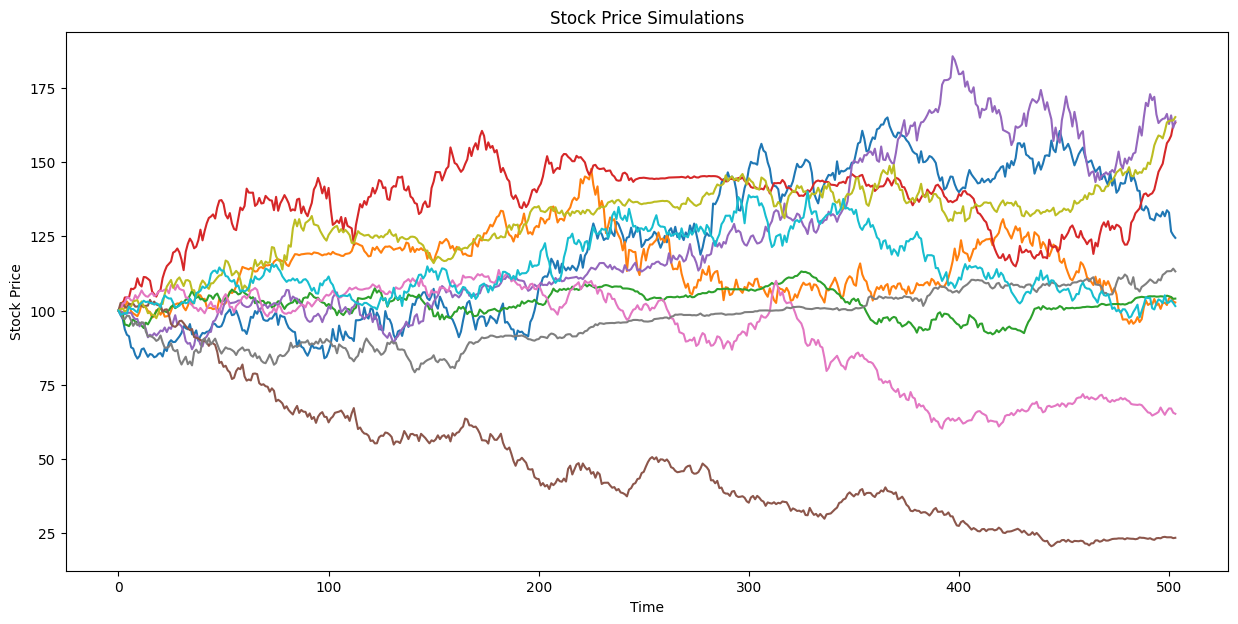

In [6]:
#Plot the paths

time = np.arange(int(delta_t**-1*n_years))

#Part 1: Stock Price
plt.figure(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulations")
plt.plot(time, S_matrix);


# ...and Variance

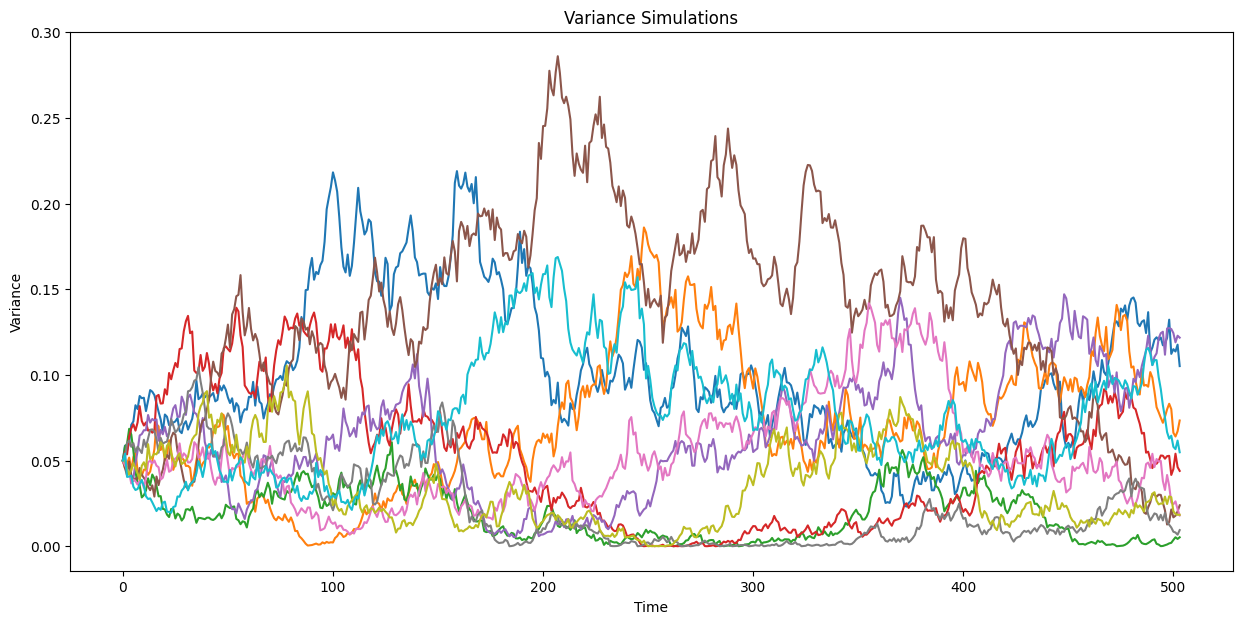

In [7]:
plt.figure(figsize=(15,7))
plt.title("Variance Simulations")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.plot(time, V_matrix);

# Calculate Option Greeks Using 2000 Simulations

In [8]:
#Sensitivity
np.random.seed(1)

h = 1
num_simulations = 2000

# V-h

    
V_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix_low.iloc[0,i] = V_0
    S_matrix_low.iloc[0,i] = S_0 - h
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
  
dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_low.iloc[k,i] = S_matrix_low.iloc[k-1,i] + rf*S_matrix_low.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_low.iloc[k-1, i])*S_matrix_low.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_low.iloc[k,i] = V_matrix_low.iloc[k-1,i] + k_q*(v_q - V_matrix_low.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_low.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_low.iloc[k,i] < 0:
            S_matrix_low.iloc[k,i] = 0
        elif V_matrix_low.iloc[k,i] < 0:
            V_matrix_low.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_low.columns:
    avg_price = S_matrix_low[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)

price_low = sum(payoff_list)/len(payoff_list)
    

# V+h
    
V_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
    
for i in range(num_simulations):
    V_matrix_high.iloc[0,i] = V_0
    S_matrix_high.iloc[0,i] = S_0 + h
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
    

dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_high.iloc[k,i] = S_matrix_high.iloc[k-1,i] + rf*S_matrix_high.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_high.iloc[k-1, i])*S_matrix_high.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_high.iloc[k,i] = V_matrix_high.iloc[k-1,i] + k_q*(v_q - V_matrix_high.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_high.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_high.iloc[k,i] < 0:
            S_matrix_high.iloc[k,i] = 0
        elif V_matrix_high.iloc[k,i] < 0:
            V_matrix_high.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_high.columns:
    avg_price = S_matrix_high[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_high = sum(payoff_list)/len(payoff_list)


# Calculate the Option Delta

In [9]:
delta = (price_high-price_low)/(2*h)
delta

0.08451145320442022

# Run Simulations to Estimate the Option Vega

In [11]:
#Sensitivity

h = 0.01
num_simulations = 2000
np.random.seed(1)

# V-h

    
V_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix_low.iloc[0,i] = V_0 - h
    S_matrix_low.iloc[0,i] = S_0
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
  
dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_low.iloc[k,i] = S_matrix_low.iloc[k-1,i] + rf*S_matrix_low.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_low.iloc[k-1, i])*S_matrix_low.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_low.iloc[k,i] = V_matrix_low.iloc[k-1,i] + k_q*(v_q - V_matrix_low.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_low.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_low.iloc[k,i] < 0:
            S_matrix_low.iloc[k,i] = 0
        elif V_matrix_low.iloc[k,i] < 0:
            V_matrix_low.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_low.columns:
    avg_price = S_matrix_low[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_low = sum(payoff_list)/len(payoff_list)
        
    

    

# V+h
    
V_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
    
for i in range(num_simulations):
    V_matrix_high.iloc[0,i] = V_0 + h
    S_matrix_high.iloc[0,i] = S_0 
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
    

dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_high.iloc[k,i] = S_matrix_high.iloc[k-1,i] + rf*S_matrix_high.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_high.iloc[k-1, i])*S_matrix_high.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_high.iloc[k,i] = V_matrix_high.iloc[k-1,i] + k_q*(v_q - V_matrix_high.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_high.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_high.iloc[k,i] < 0:
            S_matrix_high.iloc[k,i] = 0
        elif V_matrix_high.iloc[k,i] < 0:
            V_matrix_high.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_high.columns:
    avg_price = S_matrix_high[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_high = sum(payoff_list)/len(payoff_list)

# The Following Block Returns the Vega

In [12]:
vega = (price_high-price_low)/(2*h)
vega

24.09093784793539

## 4. Build a summary Table

In [13]:
# create a new df with price and vega
df = pd.DataFrame({'price': [price], 'vega': [vega], 'delta': [delta]})
df

,price,vega,delta
0,8.434053,24.090938,0.084511
